# Implementation of ANN Model Architecture

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.rand(1000, 1)   # target values

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Input(shape=(X.shape[1],)),       # Input layer (10 features)
    Dense(64, activation='relu'),     # 1st hidden layer
    Dense(32, activation='relu'),     # 2nd hidden layer
    Dense(1, activation='linear')     # Output layer (for regression)
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mse']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model on test data
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_mse:.4f}")

# CNN AlexNet 2012 Architecture Parameters

In [ ]:
import tensorflow as tf # Import the TensorFlow library
from tensorflow.keras import layers, models # Import layers and models from Keras

model = models.Sequential() # Create a Sequential model
model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3))) # Add a 2D convolutional layer
model.add(layers.BatchNormalization()) # Add a Batch Normalization layer
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))) # Add a Max Pooling layer

model.add(layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu')) # Add another 2D convolutional layer
model.add(layers.BatchNormalization()) # Add another Batch Normalization layer
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))) # Add another Max Pooling layer

model.add(layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu')) # Add a 2D convolutional layer
model.add(layers.BatchNormalization()) # Add a Batch Normalization layer

model.add(layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu')) # Add a 2D convolutional layer
model.add(layers.BatchNormalization()) # Add a Batch Normalization layer

model.add(layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu')) # Add a 2D convolutional layer
model.add(layers.BatchNormalization()) # Add a Batch Normalization layer
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2))) # Add a Max Pooling layer

model.add(layers.Flatten()) # Flatten the output
model.add(layers.Dense(4096, activation='relu')) # Add a dense layer with ReLU activation
model.add(layers.Dropout(0.5)) # Add a Dropout layer for regularization
model.add(layers.Dense(4096, activation='relu')) # Add another dense layer with ReLU activation
model.add(layers.Dropout(0.5)) # Add another Dropout layer for regularization
model.add(layers.Dense(10, activation='softmax'))  # Add the output dense layer with softmax activation (Adjust output classes as needed)

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), metrics=['accuracy']) # Compile the model
model.summary() # Print the model summary

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,327,818 (222.50 MB)

 Trainable params: 58,325,066 (222.49 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define AlexNet architecture
def AlexNet(input_shape=(227, 227, 3), num_classes=1000):
    model = models.Sequential([
        # Conv1
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3, 3), strides=2),

        # Conv2
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),

        # Conv3
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

        # Conv4
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),

        # Conv5
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),

        # Flatten
        layers.Flatten(),

        # FC1
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # FC2
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
model = AlexNet()

# Display summary (shows parameters per layer)
model.summary()

# Calculate total parameters
total_params = model.count_params()
print(f"\nTotal parameters: {total_params:,}")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,378,344 (237.95 MB)

 Trainable params: 62,378,344 (237.95 MB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 62,378,344


# Boston Housing Price Prediction with TensorFlow




Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 21.3281 - mae: 21.8281 - mse: 560.2394 - val_loss: 22.1688 - val_mae: 22.6688 - val_mse: 596.5714 - learning_rate: 0.0010
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.4094 - mae: 20.9094 - mse: 519.8516 - val_loss: 21.5676 - val_mae: 22.0676 - val_mse: 568.4651 - learning_rate: 0.0010
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2244 - mae: 19.7244 - mse: 466.2920 - val_loss: 20.5637 - val_mae: 21.0637 - val_mse: 522.4291 - learning_rate: 0.0010
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.6366 - mae: 18.1366 - mse: 410.0986 - val_loss: 18.8545 - val_mae: 19.3545 - val_mse: 451.3267 - learning_rate: 0.0010
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.4660 - mae: 15.9655 - mse: 339.5181 - val_loss: 16.2160 - val_mae: 16.7160 - val_mse: 356.4406 - learning_rate: 0.0010
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12.7143 - mae: 13.2085 - mse: 260.4620 - val_

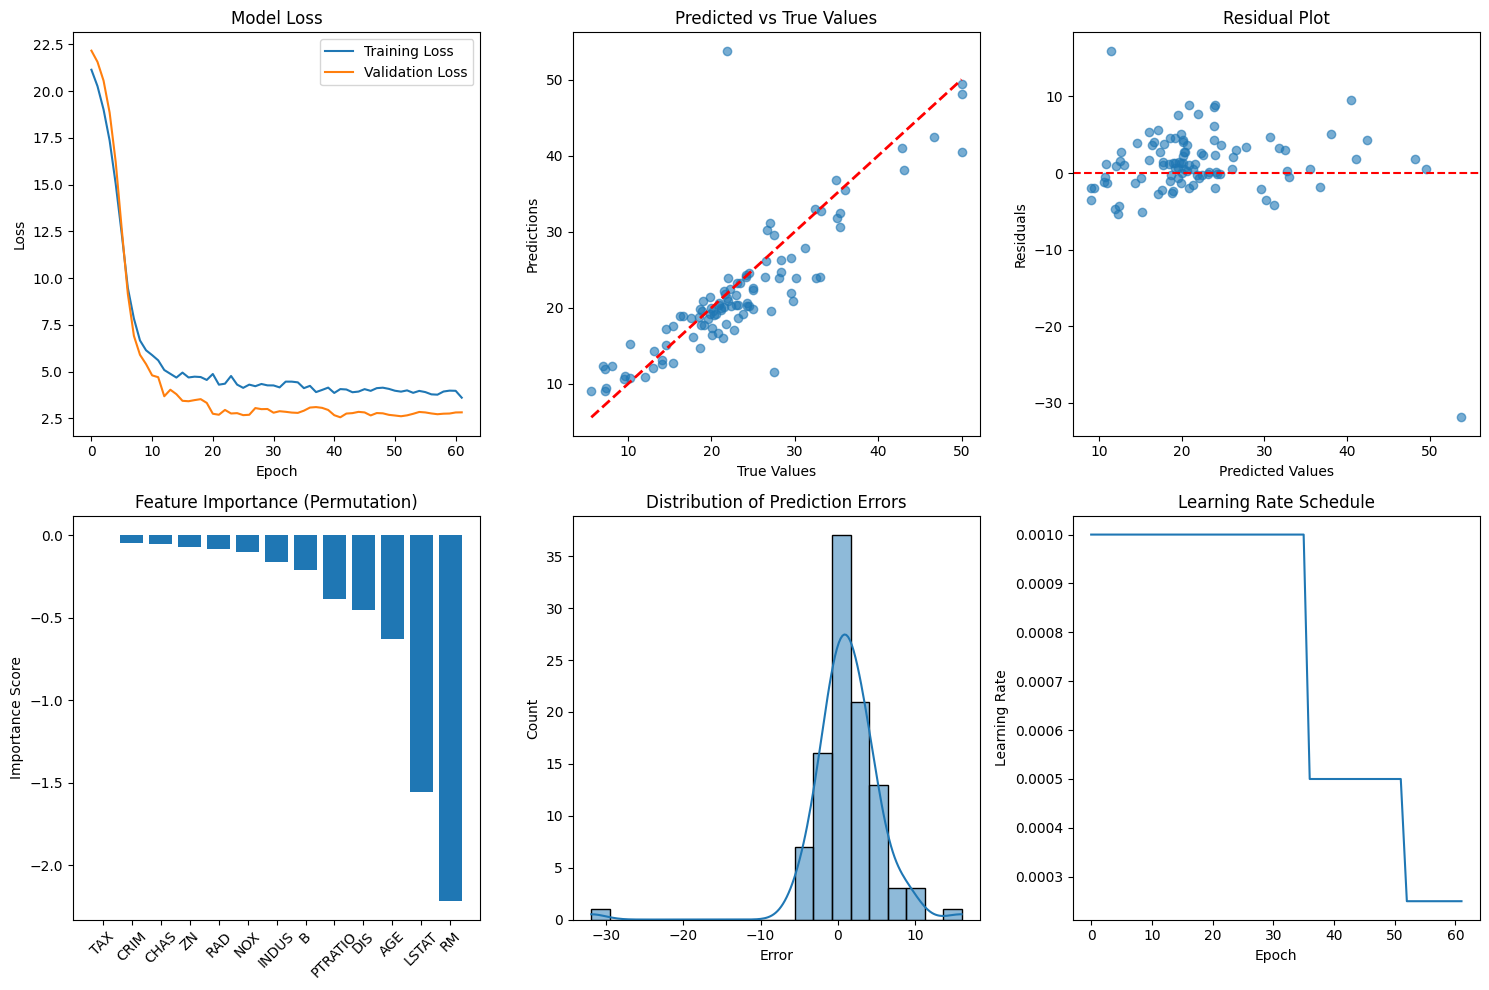

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,813 (155.52 KB)

 Trainable params: 13,121 (51.25 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 26,244 (102.52 KB)

In [ ]:
# Advanced Boston Housing Price Prediction with TensorFlow

import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load and prepare data
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Feature names for analysis
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Build advanced model with regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(13,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dropout(0.1),

    Dense(1)
])

# Compile with advanced optimizer settings
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model.compile(
    optimizer=optimizer,
    loss='huber',  # More robust than MSE
    metrics=['mae', 'mse']
)

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

# Train model
history = model.fit(
    x_train_scaled, y_train,
    batch_size=16,
    epochs=200,
    validation_data=(x_test_scaled, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate model
test_loss, test_mae, test_mse = model.evaluate(x_test_scaled, y_test, verbose=0)
predictions = model.predict(x_test_scaled)

# Calculate additional metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"\nAdvanced Model Performance:")
print(f"Test MAE: ${test_mae * 1000:.2f}")
print(f"Test RMSE: ${rmse * 1000:.2f}")
print(f"Test R² Score: {r2:.4f}")

# Feature importance analysis using permutation
def permutation_importance(model, X, y, metric_func, n_repeats=5):
    baseline_score = metric_func(y, model.predict(X).flatten())
    importances = np.zeros(X.shape[1])

    for i in range(X.shape[1]):
        scores = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i])
            permuted_score = metric_func(y, model.predict(X_permuted).flatten())
            scores.append(permuted_score - baseline_score)
        importances[i] = np.mean(scores)

    return importances

# Calculate permutation importance
importances = permutation_importance(
    model, x_test_scaled, y_test,
    lambda y_true, y_pred: -mean_absolute_error(y_true, y_pred)
)

# Visualization
plt.figure(figsize=(15, 10))

# 1. Training history
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2. Predictions vs True values
plt.subplot(2, 3, 2)
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs True Values')

# 3. Residuals
plt.subplot(2, 3, 3)
residuals = y_test - predictions.flatten()
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 4. Feature importance
plt.subplot(2, 3, 4)
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importance (Permutation)')
plt.ylabel('Importance Score')

# 5. Prediction error distribution
plt.subplot(2, 3, 5)
sns.histplot(residuals, kde=True, bins=20)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')

# 6. Learning rate schedule
plt.subplot(2, 3, 6)
plt.plot(history.history['learning_rate']) # Changed 'lr' to 'learning_rate'
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

plt.tight_layout()
plt.show()

# Display model summary
model.summary()

# Save model (optional)
# model.save('advanced_boston_housing_model.h5')

# IMDB Sentiment Analysis

In [ ]:
# Minimal IMDB Sentiment Analysis

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build simple model
model = models.Sequential([
    layers.Embedding(vocab_size, 64, input_length=max_len),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 160ms/step - accuracy: 0.6459 - loss: 0.6089 - val_accuracy: 0.8518 - val_loss: 0.3521
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 202ms/step - accuracy: 0.8782 - loss: 0.3053 - val_accuracy: 0.8578 - val_loss: 0.3297
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 171ms/step - accuracy: 0.9179 - loss: 0.2190 - val_accuracy: 0.8256 - val_loss: 0.3763
Test Accuracy: 0.8324


# California Housing Price Prediction with TensorFlow

Dataset shape: (20640, 8)
Target range: $0.1K - $5.0K
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.8426 - mae: 1.2424 - mse: 2.8399 - val_loss: 0.2729 - val_mae: 0.5671 - val_mse: 0.6747 - learning_rate: 0.0010
Epoch 2/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3157 - mae: 0.6444 - mse: 0.7726 - val_loss: 0.2257 - val_mae: 0.4964 - val_mse: 0.5491 - learning_rate: 0.0010
Epoch 3/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2646 - mae: 0.5748 - mse: 0.6355 - val_loss: 0.2004 - val_mae: 0.4648 - val_mse: 0.4791 - learning_rate: 0.0010
Epoch 4/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2474 - mae: 0.5471 - mse: 0.5915 - val_loss: 0.1906 - val_mae: 0.4548 - val_mse: 0.4620 - learning_rate: 0.0010
Epoch 5/5
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2338 - mae: 0.5317 - mse: 0.5558 - val_loss: 0.1897 - val_mae: 0.4543 - val_mse: 0.4475 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Advanced Model Performance:
Test MAE: $44271

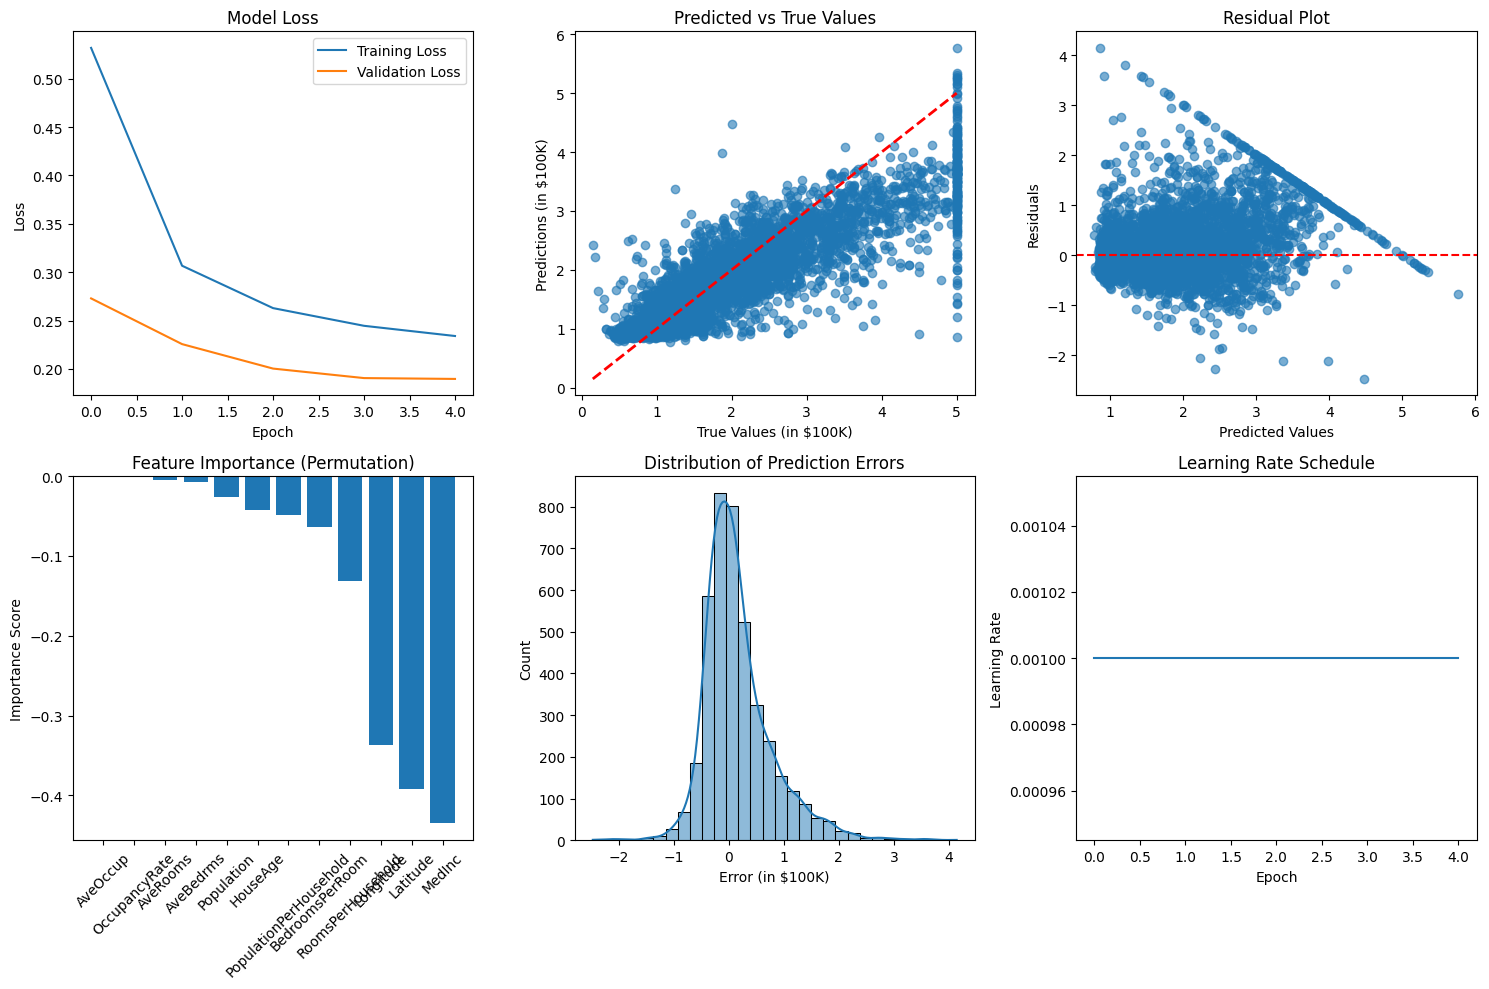

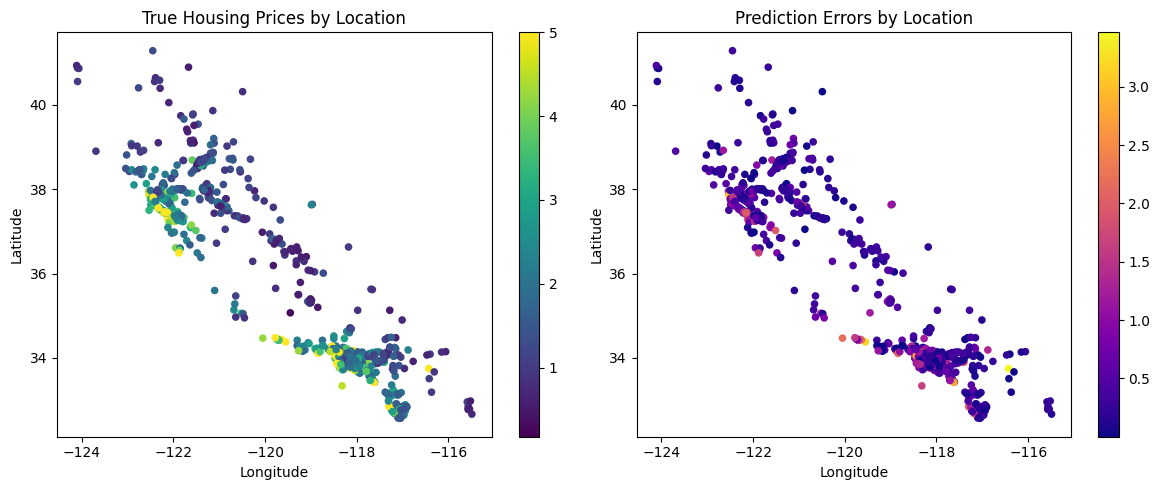

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,901 (566.02 KB)

 Trainable params: 48,001 (187.50 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 96,004 (375.02 KB)

In [ ]:
# Advanced California Housing Price Prediction with TensorFlow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Create DataFrame for better feature handling
feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
                 'AveOccup', 'Latitude', 'Longitude']
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

print(f"Dataset shape: {X.shape}")
print(f"Target range: ${y.min():.1f}K - ${y.max():.1f}K")

# Feature engineering
df['RoomsPerHousehold'] = df['AveRooms'] / (df['AveOccup'] + 1e-6)
df['BedroomsPerRoom'] = df['AveBedrms'] / (df['AveRooms'] + 1e-6)
df['PopulationPerHousehold'] = df['Population'] / (df['AveOccup'] + 1e-6)
df['OccupancyRate'] = df['AveOccup'] / df['AveRooms']

# Update feature set with engineered features
new_features = ['RoomsPerHousehold', 'BedroomsPerRoom',
                'PopulationPerHousehold', 'OccupancyRate']
X_enhanced = df[feature_names + new_features].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build advanced model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dropout(0.1),

    Dense(1)
])

# Compile with advanced optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(
    optimizer=optimizer,
    loss='huber',
    metrics=['mae', 'mse']
)

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=15,
    min_lr=1e-7,
    verbose=1
)

# Train model
history = model.fit(
    X_train_scaled, y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate model
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test, verbose=0)
predictions = model.predict(X_test_scaled).flatten()

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"\nAdvanced Model Performance:")
print(f"Test MAE: ${test_mae * 100000:.2f}")
print(f"Test RMSE: ${rmse * 100000:.2f}")
print(f"Test R² Score: {r2:.4f}")

# Feature importance using permutation
def permutation_importance(model, X, y, metric_func, n_repeats=5):
    baseline_score = metric_func(y, model.predict(X).flatten())
    importances = np.zeros(X.shape[1])

    for i in range(X.shape[1]):
        scores = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i])
            permuted_score = metric_func(y, model.predict(X_permuted).flatten())
            scores.append(permuted_score - baseline_score)
        importances[i] = np.mean(scores)

    return importances

importances = permutation_importance(
    model, X_test_scaled, y_test,
    lambda y_true, y_pred: -mean_absolute_error(y_true, y_pred)
)

# Visualization
plt.figure(figsize=(15, 10))

# 1. Training history
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2. Predictions vs True values
plt.subplot(2, 3, 2)
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values (in $100K)')
plt.ylabel('Predictions (in $100K)')
plt.title('Predicted vs True Values')

# 3. Residuals
plt.subplot(2, 3, 3)
residuals = y_test - predictions
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# 4. Feature importance
plt.subplot(2, 3, 4)
all_feature_names = feature_names + new_features
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [all_feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importance (Permutation)')
plt.ylabel('Importance Score')

# 5. Error distribution
plt.subplot(2, 3, 5)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (in $100K)')

# 6. Learning rate schedule
plt.subplot(2, 3, 6)
print(history.history.keys()) # Print keys to diagnose learning rate key
plt.plot(history.history['learning_rate'])
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

plt.tight_layout()
plt.show()

# Geographic analysis of predictions
plt.figure(figsize=(12, 5))

# Extract original latitude and longitude from test set
original_indices = np.random.choice(len(X_test), 1000, replace=False)
lat = X_test[original_indices, 6]  # Latitude
lon = X_test[original_indices, 7]  # Longitude
true_vals = y_test[original_indices]
pred_vals = predictions[original_indices]
errors = np.abs(true_vals - pred_vals)

plt.subplot(1, 2, 1)
sc = plt.scatter(lon, lat, c=true_vals, cmap='viridis', s=20)
plt.colorbar(sc)
plt.title('True Housing Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
sc = plt.scatter(lon, lat, c=errors, cmap='plasma', s=20)
plt.colorbar(sc)
plt.title('Prediction Errors by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

# Display model summary
model.summary()

# Advanced CIFAR-10 Image Classification with Modern CNN

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


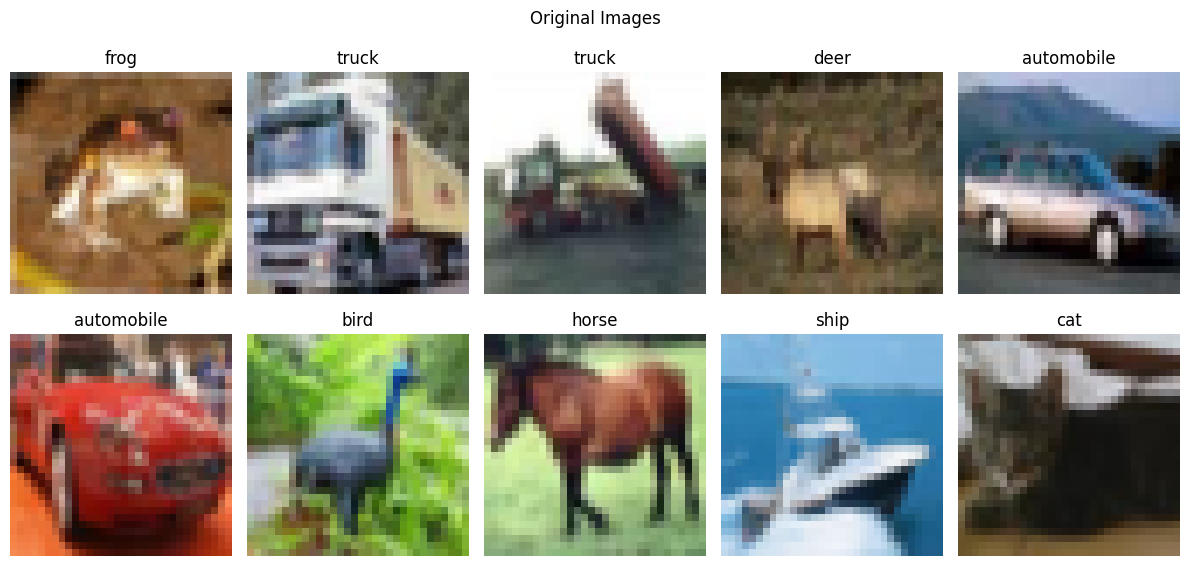

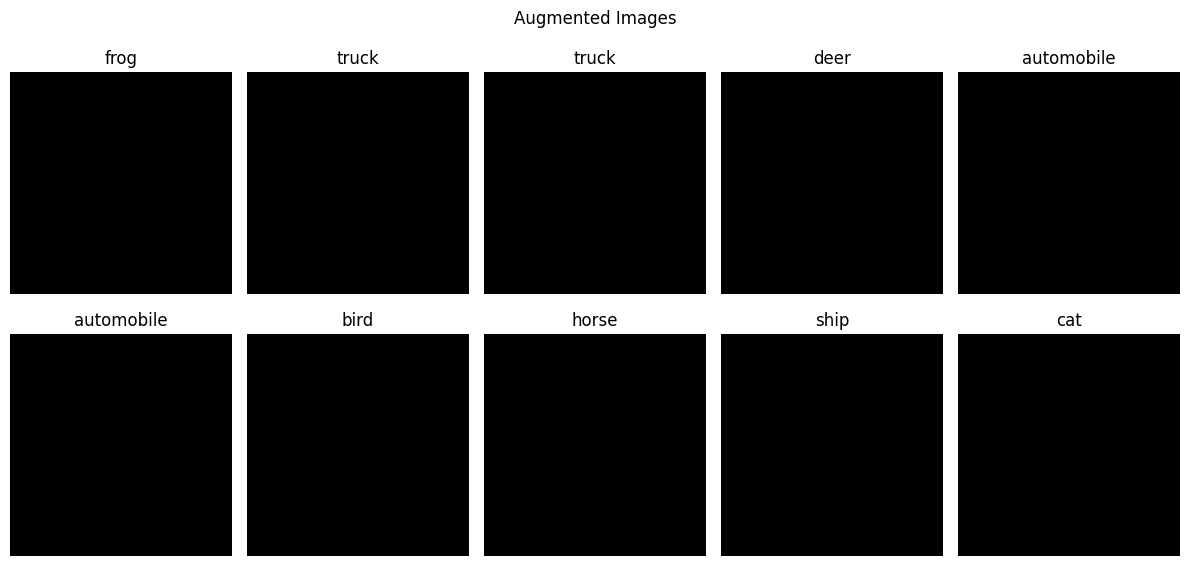

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        896 │ input_layer_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      9,248 │ activation_13[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │      9,248 │ activation_14[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ activation_13[0]… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ activation_15[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_64          │ (None, 16, 16,    │          0 │ max_pooling2d[0]… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │     18,496 │ dropout_64[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │      2,112 │ dropout_64[0][0]

 Total params: 382,602 (1.46 MB)

 Trainable params: 380,234 (1.45 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [ ]:
# Advanced CIFAR-10 Image Classification with Modern CNN

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_datasets as tfds

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {num_classes}")

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

# Fit the data generator on training data
datagen.fit(x_train)

# Display sample images with augmentation
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Get original image
    img = x_train[i]
    plt.imshow(img)
    plt.title(f'{class_names[y_train[i][0]]}')
    plt.axis('off')
plt.suptitle('Original Images')
plt.tight_layout()
plt.show()

# Show augmented versions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Get augmented image
    img_batch = datagen.flow(x_train[i:i+1], batch_size=1)[0]
    plt.imshow(img_batch[0])
    plt.title(f'{class_names[y_train[i][0]]}')
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.tight_layout()
plt.show()

# Build advanced CNN model with residual connections
def create_advanced_cnn(input_shape=(32, 32, 3), num_classes=10):
    inputs = tf.keras.Input(shape=input_shape) # Use Functional API for residual connections

    # Initial convolution block
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # First residual block
    residual = x # Save the input for the skip connection
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    # Skip connection
    x = layers.Add()([residual, x])
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # Second residual block
    residual = x # Save the input for the skip connection
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    # Skip connection
    # Need to adjust the number of filters in the residual connection if it doesn't match the current block
    if residual.shape[-1] != 64:
        residual = layers.Conv2D(64, (1, 1), padding='same')(residual)
        residual = BatchNormalization()(residual)
    x = layers.Add()([residual, x])
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.25)(x)

    # Third residual block
    residual = x # Save the input for the skip connection
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    # Skip connection
     # Need to adjust the number of filters in the residual connection if it doesn't match the current block
    if residual.shape[-1] != 128:
        residual = layers.Conv2D(128, (1, 1), padding='same')(residual)
        residual = BatchNormalization()(residual)
    x = layers.Add()([residual, x])
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.25)(x)


    # Global average pooling and classification
    x = GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model


# Create and compile the model
model = create_advanced_cnn()
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='top_3_accuracy')] # Changed to SparseTopKCategoricalAccuracy
)

# Model summary
model.summary()

# Reuter News Dataset


Training samples: 8982
Test samples: 2246
Vocabulary size: 10000
Max sequence length: 500
Number of classes: 46

Sample News Articles:

Article 1 (Topic: earn):
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to ni...

Article 2 (Topic: acq):
? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of th...

Padded training shape: (8982, 500)
Padded test shape: (2246, 500)
Label shape: (8982, 46)


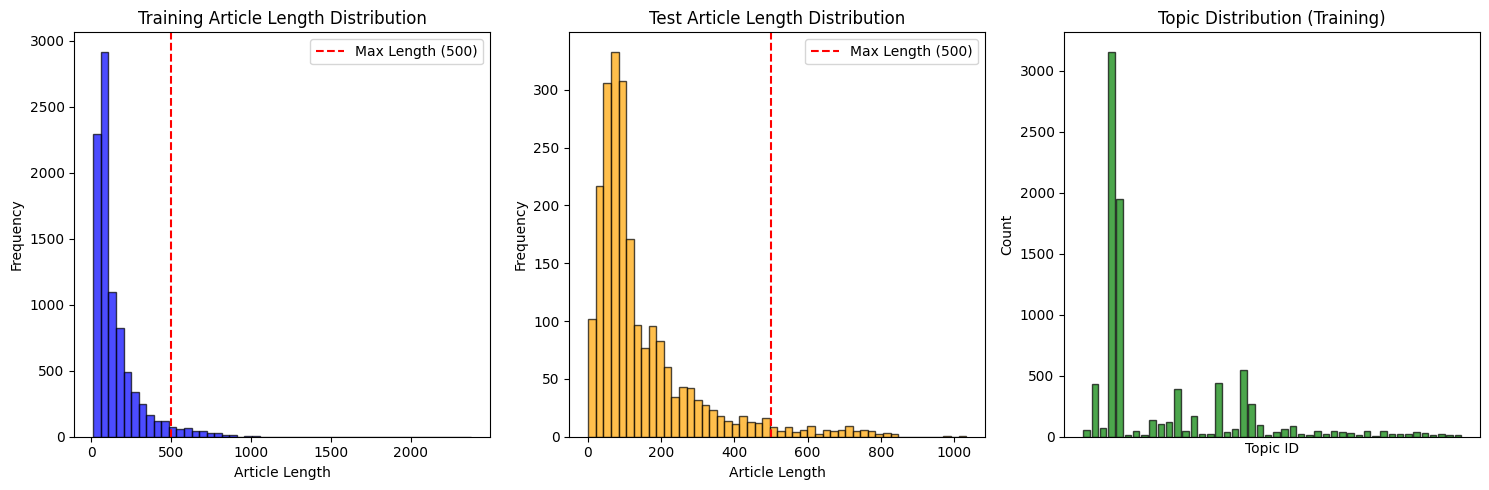

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 500, 128)  │  1,280,000 │ input_layer_14[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_58          │ (None, 500, 128)  │          0 │ embedding_12[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_12    │ (None, 500, 128)  │     98,816 │ dropout_58[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 500, 1)    │        129 │ bidirectional_12… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 500)       │          0 │ dense_67[0][0]    │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 500)       │          0 │ flatten_12[0][0]  │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_9 (Reshape) │ (None, 500, 1)    │          0 │ activation_12[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 500, 128)  │     82,048 │ dropout_58[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_11         │ (None, 500, 128)  │          0 │ bidirectional_12… │
│ (Multiply)          │                   │            │ reshape_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_12[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_9 (Lambda)   │ (None, 128)       │          0 │ multiply_11[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 64)        │      8,256 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 64)        │      8,256 │ lambda_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_59          │ (None, 64)        │          0 │ dense_66[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_60          │ (None, 64)        │          0 │ dense_68[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 128)       │          0 │ dropout_59[0][0], │
│ (Concatenate)       │                   │            │ dropout_60[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 256)       │     33,024 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_69[0][0]    │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 1,556,207 (5.94 MB)

 Trainable params: 1,555,439 (5.93 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
# Advanced Reuters News Classification with Modern NLP

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, GlobalMaxPooling1D, Attention, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2 # Import l2 regularizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load Reuters dataset
vocab_size = 10000
max_length = 500
num_classes = 46

(x_train, y_train), (x_test, y_test) = reuters.load_data(
    num_words=vocab_size, test_split=0.2
)

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
print(f"Vocabulary size: {vocab_size}")
print(f"Max sequence length: {max_length}")
print(f"Number of classes: {num_classes}")

# Get word index and reverse word index
word_index = reuters.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_news(encoded_news):
    """Convert encoded news article back to text"""
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_news])

# Get class names (Reuters topics)
def get_topic_names():
    topic_names = [
        'cocoa', 'grain', 'veg-oil', 'earn', 'acq', 'wheat', 'copper', 'housing',
        'money-supply', 'coffee', 'sugar', 'trade', 'reserves', 'ship', 'cotton',
        'carcass', 'crude', 'nat-gas', 'cpi', 'money-fx', 'interest', 'gnp',
        'meal-feed', 'alum', 'oilseed', 'gold', 'tin', 'strategic-metal',
        'livestock', 'retail', 'ipi', 'iron-steel', 'rubber', 'heat', 'jobs',
        'lei', 'bop', 'zinc', 'orange', 'pet-chem', 'dlr', 'veg', 'residential',
        'nonresidential', 'builder', 'steel', 'carrier', 'commodity', 'wpi',
        'interest', 'gnp', 'money-fx'
    ]
    return topic_names

topic_names = get_topic_names()

# Display sample news articles
print("\nSample News Articles:")
for i in range(2):
    print(f"\nArticle {i+1} (Topic: {topic_names[y_train[i]]}):")
    print(decode_news(x_train[i])[:200] + "...")

# Pad sequences to ensure uniform input size
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Convert labels to categorical one-hot encoding
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print(f"\nPadded training shape: {x_train_padded.shape}")
print(f"Padded test shape: {x_test_padded.shape}")
print(f"Label shape: {y_train_cat.shape}")

# Analyze article length distribution
train_lengths = [len(x) for x in x_train]
test_lengths = [len(x) for x in x_test]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_lengths, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Training Article Length Distribution')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.axvline(x=max_length, color='red', linestyle='--', label=f'Max Length ({max_length})')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(test_lengths, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Test Article Length Distribution')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.axvline(x=max_length, color='red', linestyle='--', label=f'Max Length ({max_length})')
plt.legend()

plt.subplot(1, 3, 3)
# Topic distribution
topic_counts = Counter(y_train)
topics, counts = zip(*sorted(topic_counts.items()))
plt.bar(range(len(topics)), counts, alpha=0.7, color='green', edgecolor='black')
plt.title('Topic Distribution (Training)')
plt.xlabel('Topic ID')
plt.ylabel('Count')
plt.xticks([])  # Hide x-ticks due to too many topics

plt.tight_layout()
plt.show()

# Build advanced hybrid model for multi-class classification
def create_reuters_model(vocab_size=10000, max_length=500, num_classes=46, embedding_dim=128):
    inputs = layers.Input(shape=(max_length,))

    # Embedding layer
    x = Embedding(vocab_size, embedding_dim, input_length=max_length,
                  embeddings_regularizer=l2(1e-4))(inputs)
    x = Dropout(0.3)(x)

    # CNN branch for local feature extraction
    cnn_branch = Conv1D(128, 5, activation='relu', padding='same')(x)
    cnn_branch = GlobalMaxPooling1D()(cnn_branch)
    cnn_branch = Dense(64, activation='relu')(cnn_branch)
    cnn_branch = Dropout(0.5)(cnn_branch)

    # BiLSTM branch for sequential context
    lstm_branch = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3,
                                     recurrent_dropout=0.3))(x)
    # lstm_branch = Dropout(0.3)(lstm_branch) # Removed duplicate dropout

    # Attention mechanism
    # Calculate attention weights over the sequence length
    attention_weights = layers.Dense(1, activation='tanh')(lstm_branch)
    attention_weights = layers.Flatten()(attention_weights)
    attention_weights = layers.Activation('softmax')(attention_weights)
    attention_weights = layers.Reshape((max_length, 1))(attention_weights) # Reshape to (batch_size, max_length, 1)

    # Apply attention
    sent_representation = layers.Multiply()([lstm_branch, attention_weights]) # Multiply element-wise
    lstm_branch = layers.Lambda(lambda xin: tf.keras.backend.sum(xin, axis=1))(sent_representation) # Sum over the sequence length
    lstm_branch = Dense(64, activation='relu')(lstm_branch)
    lstm_branch = Dropout(0.5)(lstm_branch)

    # Combine branches
    combined = layers.concatenate([cnn_branch, lstm_branch])
    combined = Dense(256, activation='relu')(combined)
    combined = BatchNormalization()(combined)
    combined = Dropout(0.6)(combined)

    # Additional dense layers for 46 classes
    combined = Dense(128, activation='relu')(combined)
    combined = BatchNormalization()(combined)
    combined = Dropout(0.5)(combined)

    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.4)(combined)

    # Output layer for 46 classes
    outputs = Dense(num_classes, activation='softmax')(combined)

    model = models.Model(inputs, outputs)
    return model

# Create and compile the model
model = create_reuters_model(vocab_size, max_length, num_classes)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='top_3_accuracy'), tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name='top_5_accuracy')] # Changed metric names
)

# Model summary
model.summary()

# Fashion MNIST DataSet

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 110ms/step - accuracy: 0.6627 - loss: 0.9424 - val_accuracy: 0.8367 - val_loss: 0.4359
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.8400 - loss: 0.4534 - val_accuracy: 0.8608 - val_loss: 0.3728
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.8635 - loss: 0.3843 - val_accuracy: 0.8769 - val_loss: 0.3354
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.8774 - loss: 0.3462 - val_accuracy: 0.8814 - val_loss: 0.3233
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.8831 - loss: 0.3208 - val_accuracy: 0.8918 - val_loss: 0.2973
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


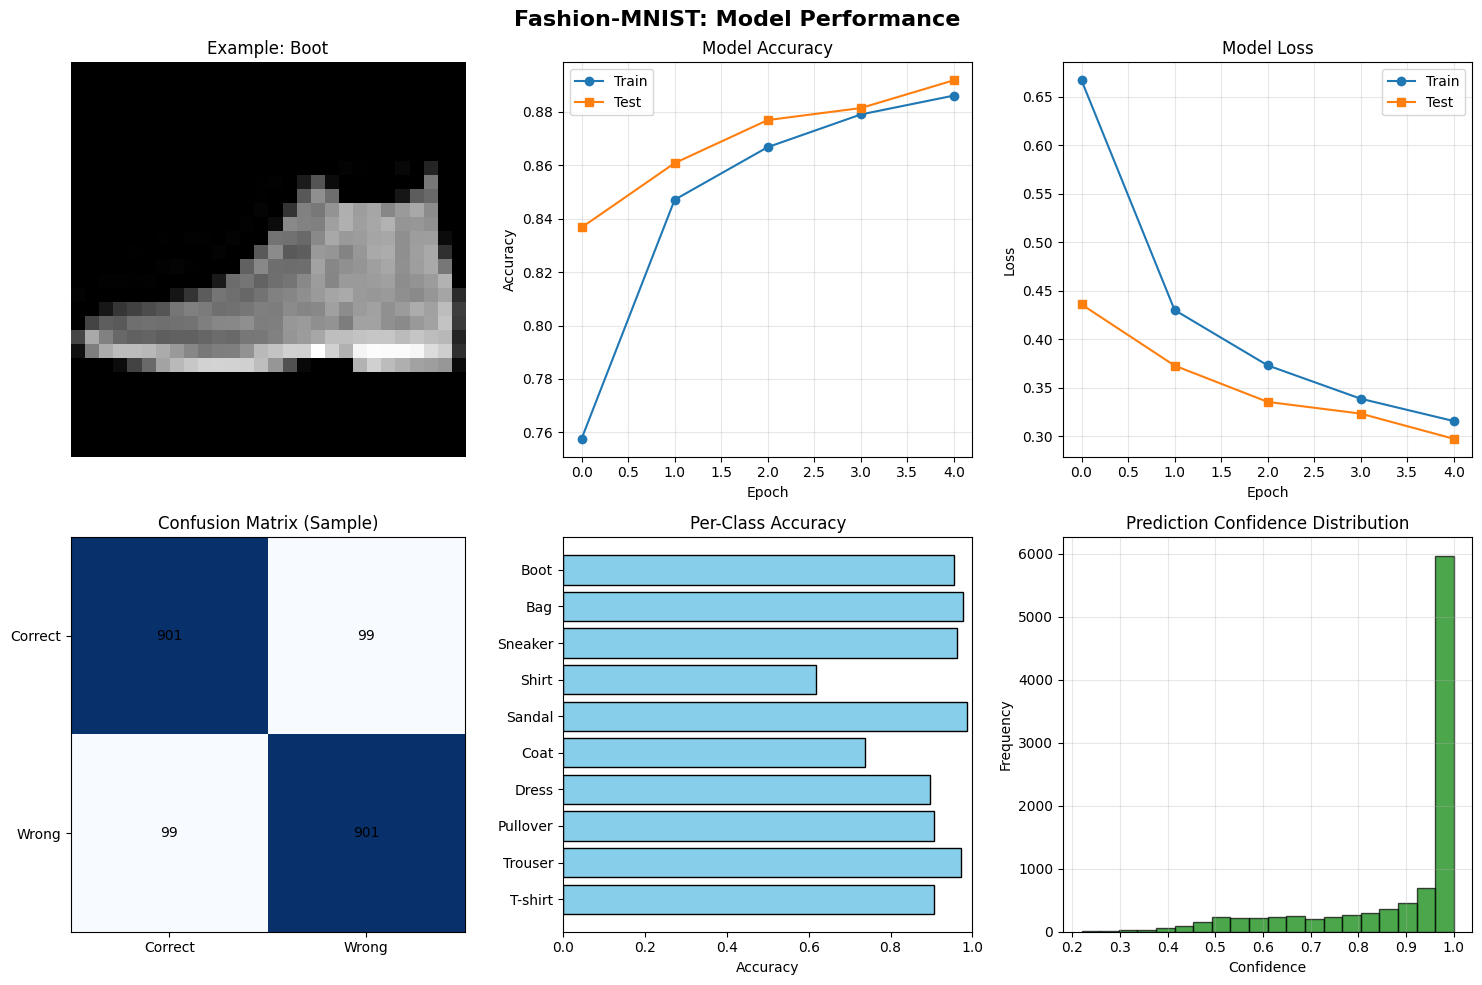

Test Accuracy: 0.8918


In [ ]:
# Fashion-MNIST Dataset

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

# Predictions
preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

# Class names
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

# Professional 6-panel visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Fashion-MNIST: Model Performance', fontsize=16, weight='bold')

# 1. Sample images
axes[0,0].imshow(x_test[0].reshape(28,28), cmap='gray')
axes[0,0].set_title(f'Example: {class_names[y_true[0]]}', fontsize=12)
axes[0,0].axis('off')

# 2. Accuracy
axes[0,1].plot(history.history['accuracy'], label='Train', marker='o')
axes[0,1].plot(history.history['val_accuracy'], label='Test', marker='s')
axes[0,1].set_title('Model Accuracy')
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)

# 3. Loss
axes[0,2].plot(history.history['loss'], label='Train', marker='o')
axes[0,2].plot(history.history['val_loss'], label='Test', marker='s')
axes[0,2].set_title('Model Loss')
axes[0,2].set_xlabel('Epoch')
axes[0,2].set_ylabel('Loss')
axes[0,2].legend()
axes[0,2].grid(alpha=0.3)

# 4. Confusion matrix (simplified)
cm = np.zeros((2,2))
cm[0,0] = np.sum((y_true[:1000] == y_pred[:1000]))
cm[0,1] = np.sum((y_true[:1000] != y_pred[:1000]))
cm[1,0] = cm[0,1]
cm[1,1] = cm[0,0]
im = axes[1,0].imshow(cm, cmap='Blues')
axes[1,0].set_title('Confusion Matrix (Sample)')
axes[1,0].set_xticks([0,1])
axes[1,0].set_yticks([0,1])
axes[1,0].set_xticklabels(['Correct', 'Wrong'])
axes[1,0].set_yticklabels(['Correct', 'Wrong'])
for i in range(2):
    for j in range(2):
        axes[1,0].text(j, i, f'{int(cm[i,j])}', ha='center', va='center')

# 5. Per-class accuracy
acc_per_class = np.array([np.mean(y_pred[y_true==i] == i) for i in range(10)])
axes[1,1].barh(class_names, acc_per_class, color='skyblue', edgecolor='black')
axes[1,1].set_title('Per-Class Accuracy')
axes[1,1].set_xlabel('Accuracy')
axes[1,1].set_xlim(0,1)

# 6. Prediction confidence
confidences = np.max(preds, axis=1)
axes[1,2].hist(confidences, bins=20, alpha=0.7, color='green', edgecolor='black')
axes[1,2].set_title('Prediction Confidence Distribution')
axes[1,2].set_xlabel('Confidence')
axes[1,2].set_ylabel('Frequency')
axes[1,2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Final accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


# CIFAR 10

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load and normalize CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


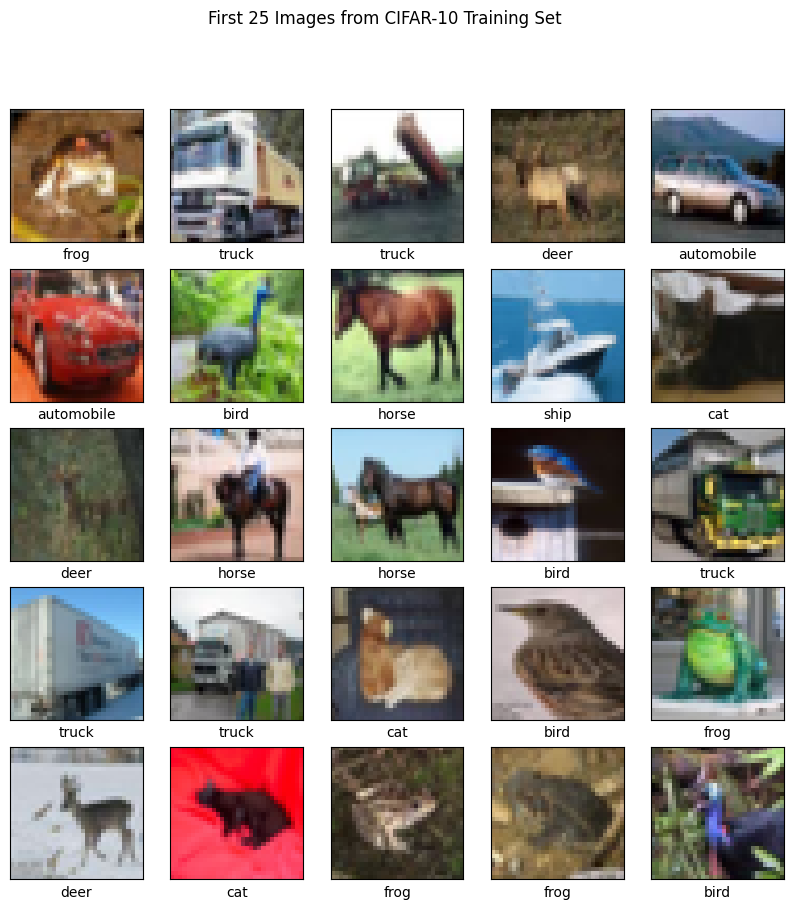

In [ ]:
# Display 5x5 = 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("First 25 Images from CIFAR-10 Training Set")
plt.show()

In [ ]:
# Display model architecture
print("Model Architecture:")
model.summary()

# Calculate total parameters
total_params = model.count_params()
print(f"\\nTotal parameters: {total_params}")

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

\nTotal parameters: 167562


In [ ]:
# Build CNN model with 2 Conv and 2 FC layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3966 - loss: 1.6606 - val_accuracy: 0.6053 - val_loss: 1.1273
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6212 - loss: 1.0838 - val_accuracy: 0.6479 - val_loss: 1.0186
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 26ms/step - accuracy: 0.6712 - loss: 0.9461 - val_accuracy: 0.6632 - val_loss: 0.9657
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7111 - loss: 0.8275 - val_accuracy: 0.6821 - val_loss: 0.8987
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7333 - loss: 0.7570 - val_accuracy: 0.7033 - val_loss: 0.8638
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7636 - loss: 0.6800 - val_accuracy: 0.6943 - val_loss: 0.9018
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7819 - loss: 0.6253 - val_accuracy: 0.7091 - val_loss: 0.8686
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8035 -

# CIFAR 100 Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR-100 dataset with fine labels
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 61s 0us/step


In [ ]:
# Define fine-grained class names for CIFAR-100
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
    'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

In [ ]:
# Normalize pixel values to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Display dataset properties
print(f"Training images shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of training samples: {x_train.shape[0]}")
print(f"Number of test samples: {x_test.shape[0]}")
print(f"Image dimensions: {x_train.shape[1:3]}")
print(f"Number of channels: {x_train.shape[3]}")
print(f"Number of classes: {len(np.unique(y_train))}")

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of training samples: 50000
Number of test samples: 10000
Image dimensions: (32, 32)
Number of channels: 3
Number of classes: 100


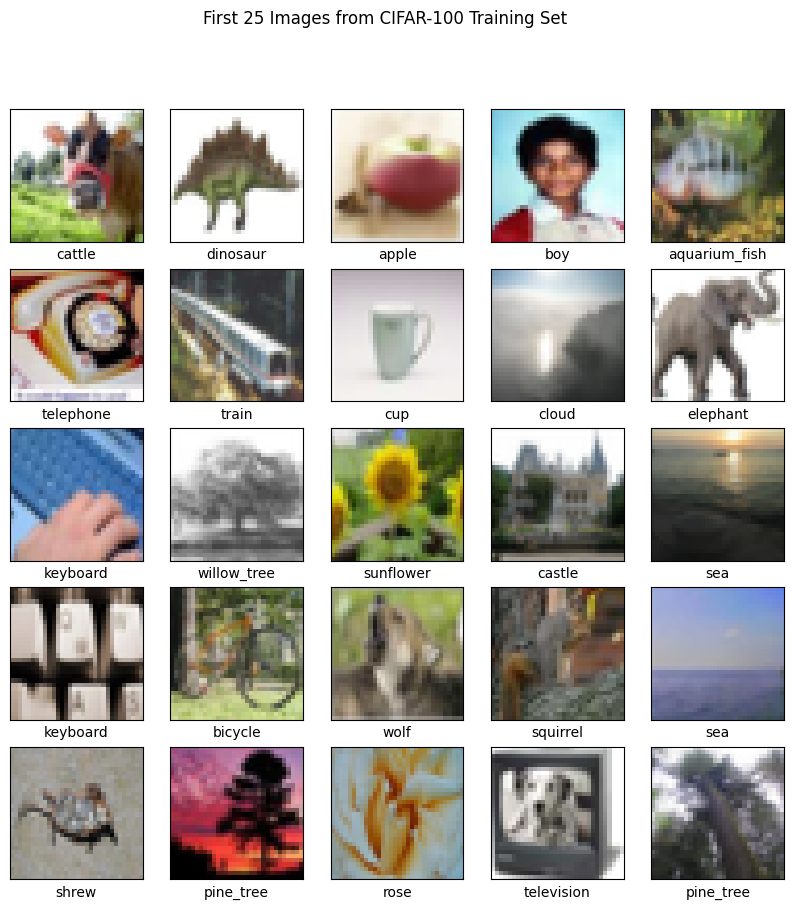

In [ ]:
# Display 5x5 = 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.suptitle("First 25 Images from CIFAR-100 Training Set")
plt.show()

In [ ]:
# Build CNN model with 2 Conv and 2 FC layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100)  # 100 output classes for CIFAR-100
])

# Display model architecture
print("Model Architecture:")
model.summary()

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0577 - loss: 4.2187 - val_accuracy: 0.1705 - val_loss: 3.5162
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1963 - loss: 3.3389 - val_accuracy: 0.2316 - val_loss: 3.2062
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2575 - loss: 3.0233 - val_accuracy: 0.2730 - val_loss: 2.9765
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2963 - loss: 2.8251 - val_accuracy: 0.3013 - val_loss: 2.8253
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3223 - loss: 2.6845 - val_accuracy: 0.3082 - val_loss: 2.7875
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3401 - loss: 2.5889 - val_accuracy: 0.3222 - val_loss: 2.7131
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3523 - loss: 2.5054 - val_accuracy: 0.3292 - val_loss: 2.6785
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3734 - loss: 2.4261 -